In [1]:
import sympy as sp
import matplotlib.pyplot as plt 
import scipy as scp
m, g, R, M, I, k, t, VV, E0, r = sp.symbols('m, g, R, M, I, gamma t, omega, E0, r ')

y0, u, w = sp.symbols('y0, u, w ') # y0=y center mass0, u-v center wheel0, w-m vel0

E0 = m*g*y0 + M*u**2/2 + I*u**2/(2*R**2) + m*w**2/2

fi0 = sp.symbols('varphi0')
fi = sp.Function(r'\varphi')(t)
ycm = R*(1+k*sp.cos(fi+fi0))
xmdot = (R*(fi+fi0)+r*sp.sin(fi+fi0)).diff(t)
ymdot = (R+r*sp.cos(fi+fi0)).diff(t)

E1= m*g*ycm #Wpm
E2 = M*(fi.diff()*R)**2/2 #EM cm
E3 = I*fi.diff()**2/2 #EM relat cm
E4= m*(xmdot**2+ymdot**2)/2 # Em
E = E1 +E2 + E3 +E4

    
#calculations
eq = sp.Eq(E,E0)
fidotonfi = list(sp.solveset(eq, fi.diff()))[1]
fidoubledotonfi = fidotonfi.diff(t)
fidoubledotonfi
ycm1 = (ycm.diff(t,2).subs(sp.diff(fi,t,2), fidoubledotonfi )).subs(sp.diff(fi,t), fidotonfi)
import matplotlib.pyplot as plt
import numpy as np
exprg = m*r/((M+m)*R)
ycm1 = ycm1.subs(k, exprg )



num = 100
u1 = 2.75
u2 = 5
s=0
t=0
rin = 0.059 #the third hole 0.059, the second 3.65
Rin = 0.075

t0 = num*(u2-u1)
arrv = [ 0 for i in range(int(u1*num),int(u2*num),1)]
arrfic = [ 0 for i in range(int(u1*num),int(u2*num),1)]

p = (Rin - rin)/Rin
for un in range (int(u1*num),int(u2*num),1):
    arrv[s]=un/num
    arr = [(M,0.070), (R,Rin), (r, rin), (m, 0.074), (I,2.15*10**-4), (g,9.8), #system patameters
    (y0, Rin - rin), (u,un/num), (w,p*un/num), (fi0, 3.1415)] #initial parameters
    #substitution of gamma on distance between m and center of the wheel
    ycmalternating = ycm1.subs(arr)

    yddonfi = sp.lambdify(fi,ycmalternating, modules = np)
    #acquiring fi angle of jump 
    fiarr = np.linspace(0,3.5,10000)
    for fic in fiarr:
        if -9.81 < yddonfi(fic) < -9.79:
            arrfic[s] = fic
            break
    s+=1
    t+=1
    if t % 10 ==0:
        print(t,'/',t0)






10 / 225.0
20 / 225.0
30 / 225.0
40 / 225.0
50 / 225.0
60 / 225.0
70 / 225.0
80 / 225.0
90 / 225.0
100 / 225.0
110 / 225.0
120 / 225.0
130 / 225.0
140 / 225.0
150 / 225.0
160 / 225.0
170 / 225.0
180 / 225.0
190 / 225.0
200 / 225.0
210 / 225.0
220 / 225.0


In [2]:
import pandas as pd

In [12]:
data1 = pd.read_csv('d(v) 600 third hole v2.txt', sep='\t')
data1['errd']=1.5
data1['errv']=0.2


<ErrorbarContainer object of 3 artists>

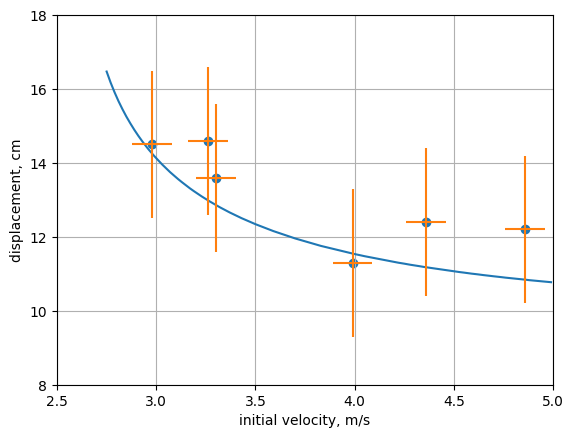

In [5]:
#plotting graph of displacement on initial velocity dependence
import matplotlib.pyplot as plt
plt.grid()
#plt.title('displacement before jump on initial velocity of the center of the disk')
plt.ylabel('displacement, cm')
plt.xlabel('initial velocity, m/s')
plt.ylim(8,18)
plt.xlim(2.5,5)
plt.plot(arrv, [i*0.075*100 for i in arrfic])
# data1 = pd.read_csv('d(v) 600 third hole v2.txt', sep='\t')
# plt.scatter(data1['v'], data1['d'])
# plt.errorbar(data1['v'], data1['d'], xerr=0.1, yerr=2, ls='none')